# Kramers-demo.ipynb

This notebook provides illustration of the Kramers problem [1] (diffusion in a double well potential). 
Here, we simply compute numerically the rate of transition between the two attractors.

## *References*

- [1] Kramers, Physica, 7, 284-304 (1940)
- [2] Gardiner, Handbook of Stochastic Methods, Springer, chap. 9.
- [3] Caroli, Caroli and Roulet, J. Stat. Phys., 26, 83-111 (1981)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import stochtrans1D

We use the *DoubleWell* python class which provides a framework for gradient systems with noise and possibly periodic forcing (not used in this notebook).

## Deterministic dynamics

In [2]:
dw  = stochtrans1D.DoubleWell(0)

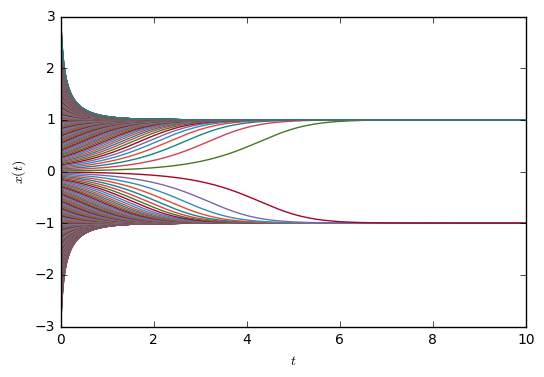

In [3]:
dw.phaseportrait(-3,3,300,1000,0.01)

$x=-1$ and $x=1$ are stable fixed points with basins of attraction $]-\infty,0[$ and $]0,+\infty[$, respectively, separated by an unstable fixed point at $x=0$.
Typical relaxation time is of order one but diverges as $x_0$ goes to 0.

## Stochastic dynamics: transitions between attractors

#### Examples of trajectories for different parameters

In [8]:
sdw = stochtrans1D.DoubleWell(0.1)
t,x = sdw.trajectory(-1,0,T=100000,dt=0.01)

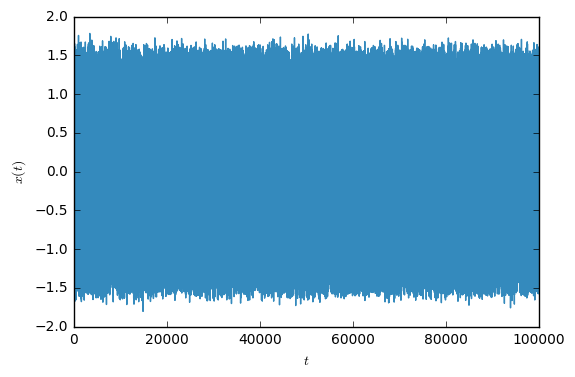

In [9]:
sdw.trajectoryplot((t,x))

In [101]:
sdw.transitionrate(x)

0.00201

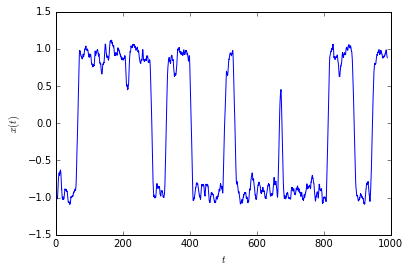

In [102]:
sdw.trajectoryplot(doublewell.running_mean(x,1000),dt=0.01)

In [103]:
sdw.transitionrate(x,avg=1000)

0.00011110998878799205

In [4]:
sdw2 = doublewell.DoubleWell(0.05)
x2 = sdw2.trajectory(-1,10000000,0.1)

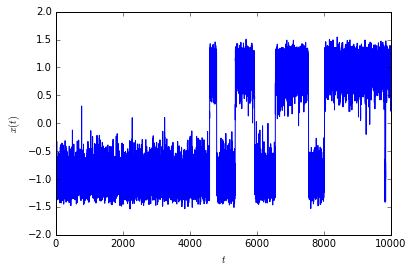

In [7]:
sdw2.trajectoryplot(x2,dt=0.1,tmax=10000)

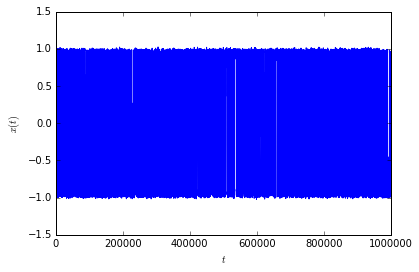

In [8]:
sdw2.trajectoryplot(doublewell.running_mean(x2,1000),dt=0.1)

In [9]:
sdw2.transitionrate(x2,avg=1000)

0.00012461244878363348

In [22]:
sdw3 = doublewell.DoubleWell(0.01)
x3 = sdw3.trajectory(-1,100000000,0.01)

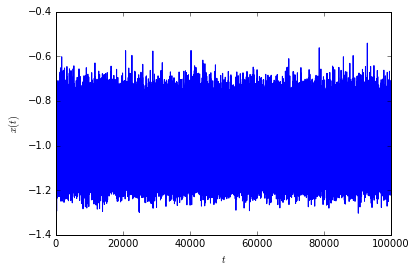

In [28]:
sdw3.trajectoryplot(x3,dt=0.01,tmax=100000)

#### Transition rate as a function of diffusion coefficient (i.e. temperature)

In [46]:
models = [ (D, doublewell.DoubleWell(D)) for D in np.linspace(0.01,1.0,100)]

In [15]:
for D, mod in models:
    print D, mod.transitionrate(mod.trajectory(-1,100000,0.01),avg=1000)

0.01 0.0
0.02 0.0
0.03 0.0
0.04 1.01009080716e-05
0.05 2.02018161433e-05
0.06 9.09081726447e-05
0.07 3.03027242149e-05
0.08 9.09081726447e-05
0.09 0.000161614529146
0.1 0.000131311804931


In [47]:
rate = [ (D,mod.transitionrate(mod.trajectory(-1,1000000,0.01),avg=1000)) for D, mod in models]

In [52]:
len(rate)

100

In [34]:
rate

[(0.01, 0.0),
 (0.020000000000000004, 0.0),
 (0.030000000000000006, 0.0),
 (0.040000000000000008, 0.0),
 (0.05000000000000001, 2.020181614327128e-05),
 (0.060000000000000012, 2.020181614327128e-05),
 (0.070000000000000007, 7.070635650144948e-05),
 (0.080000000000000002, 7.070635650144948e-05),
 (0.090000000000000011, 0.00016161452914617024),
 (0.10000000000000001, 0.00017171543721780587)]

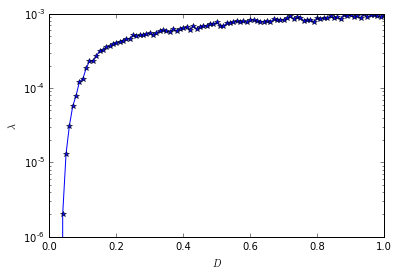

In [50]:
plt.plot(*zip(*rate),marker='*')
plt.gca().set_yscale('log')
plt.xlabel('$D$')
plt.ylabel('$\lambda$')

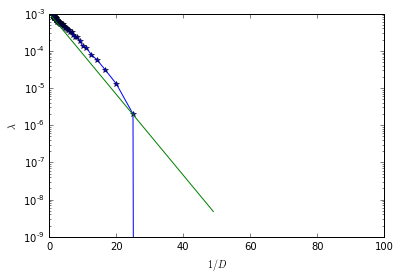

In [59]:
plt.plot(*zip(*[(1./D, l) for D,l in rate]),marker='*')
plt.plot([0.001*np.exp(-0.25*x) for x in xrange(50)])
plt.gca().set_yscale('log')
plt.xlabel('$1/D$')
plt.ylabel('$\lambda$')

In [69]:
models[0][1].transitionrate(models[0][1].trajectory(-1,10000000,0.01))

0.0

In [2]:
import data
db = data.FirstPassageData(stochtrans1D.DoubleWell,path="~/data/stochtrans/doublewell.db")

In [4]:
for eps in 1./np.arange(1.,51.0):
    db[eps,0.0,-1.0,0.01,0.0,1000]

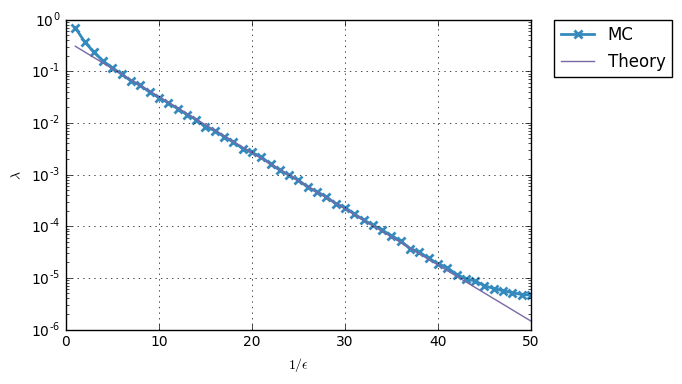

In [16]:
ax = plt.axes()
ax.set_yscale('log')
ax.set_xlabel(r'$1/\epsilon$')
ax.set_ylabel(r'$\lambda$')
ax.grid()
line, = ax.plot(*zip(*[(1./eps,1./np.mean(db[eps,0.0,-1.0,0.01,0.0])) for eps in sorted(db.show_eps())]),lw=2,marker='x',mew=2,label='MC')
line, = ax.plot(*zip(*[(1./eps,np.exp(-0.25/eps)*np.sqrt(6)/(2*np.pi)) for eps in sorted(db.show_eps())]),label='Theory')
legend = plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.,numpoints=1)

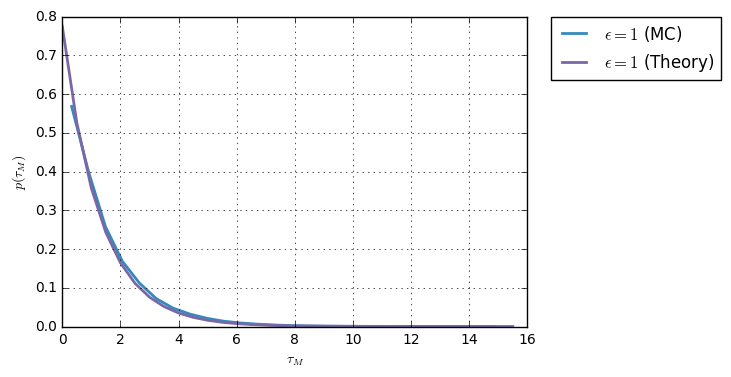

In [5]:
stochtrans1D.StochModel.escapetime_pdfplot(stochtrans1D.StochModel.escapetime_pdf(db[1.0,0.0,-1.0,0.01,0.0]),stochtrans1D.DoubleWell(1.0).firstpassagetime_cdf(-1.0,0.0,*np.arange(0.,16.0,0.5),src='theory',out='pdf'),labels=[r'$\epsilon=1$ (MC)',r'$\epsilon=1$ (Theory)'])

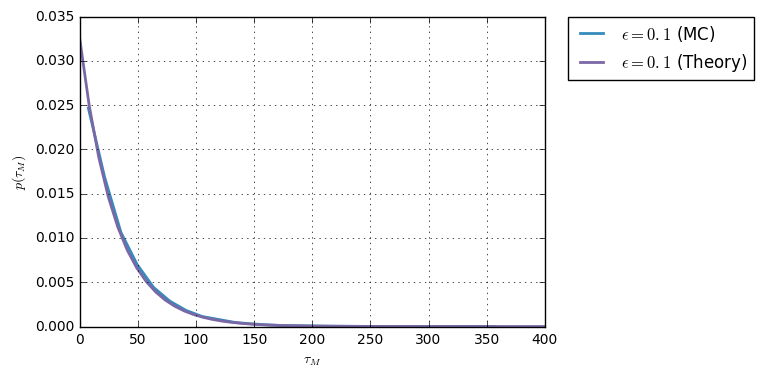

In [9]:
stochtrans1D.StochModel.escapetime_pdfplot(stochtrans1D.StochModel.escapetime_pdf(db[0.1,0.0,-1.0,0.01,0.0]),stochtrans1D.DoubleWell(0.1).firstpassagetime_cdf(-1.0,0.0,*np.linspace(0.,400.0),src='theory',out='pdf'),labels=[r'$\epsilon=0.1$ (MC)',r'$\epsilon=0.1$ (Theory)'])

In [23]:
db[0.1,0.0,-1.0,0.01,0.0,1000000]

array([ 20.54037476,  10.15013695,  14.14022827, ...,  16.98029327,
        58.68615723,  22.58042145])

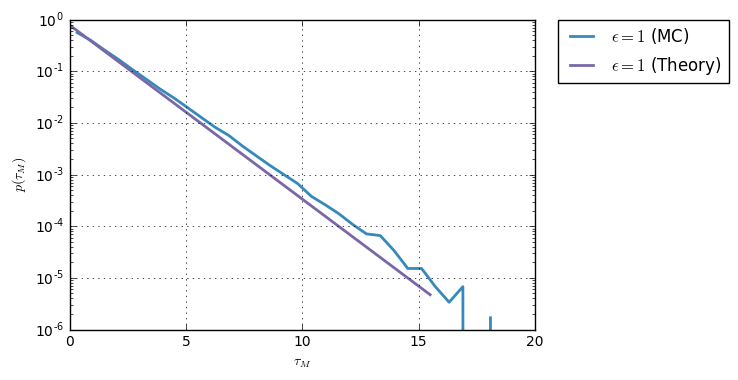

In [22]:
stochtrans1D.StochModel.escapetime_pdfplot(stochtrans1D.StochModel.escapetime_pdf(db[1.0,0.0,-1.0,0.01,0.0]),stochtrans1D.DoubleWell(1.0).firstpassagetime_cdf(-1.0,0.0,*np.arange(0.,16.0,0.5),src='theory',out='pdf'),labels=[r'$\epsilon=1$ (MC)',r'$\epsilon=1$ (Theory)'],yscale='log')

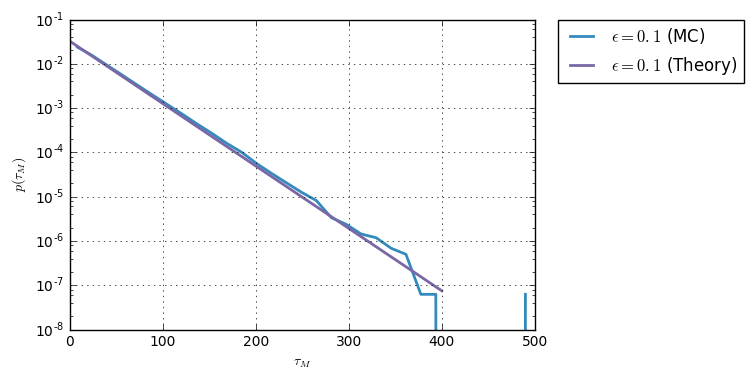

In [24]:
stochtrans1D.StochModel.escapetime_pdfplot(stochtrans1D.StochModel.escapetime_pdf(db[0.1,0.0,-1.0,0.01,0.0]),stochtrans1D.DoubleWell(0.1).firstpassagetime_cdf(-1.0,0.0,*np.linspace(0.,400.0),src='theory',out='pdf'),labels=[r'$\epsilon=0.1$ (MC)',r'$\epsilon=0.1$ (Theory)'],yscale='log')

# Fokker-Planck equation

## Numerical solution of the FP equation, with reflecting BC on both sides

With reasonable boundary conditions, the stationary solution should be close to the stationary solution on the line, i.e. proportional to $e^{-V(x)/\epsilon}$.

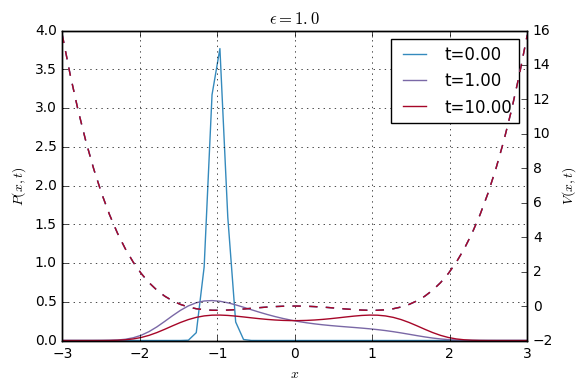

In [66]:
stochtrans1D.DoubleWell(1.0).pdfplot(0.0,1.0,10.0,potential=True,dt=0.001,npts=60,bounds=(-3.0,3.0))

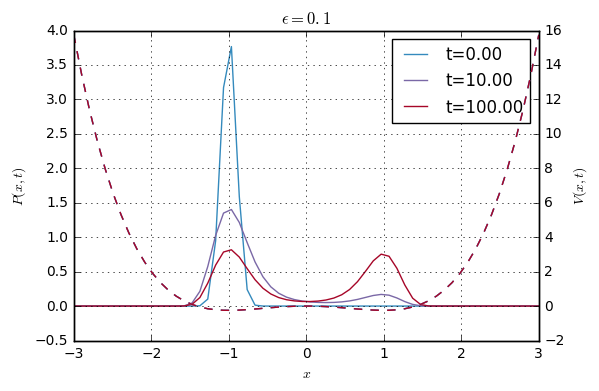

In [69]:
stochtrans1D.DoubleWell(0.1).pdfplot(0.0,10.0,100.0,potential=True,dt=0.001,npts=60,bounds=(-3.0,3.0))

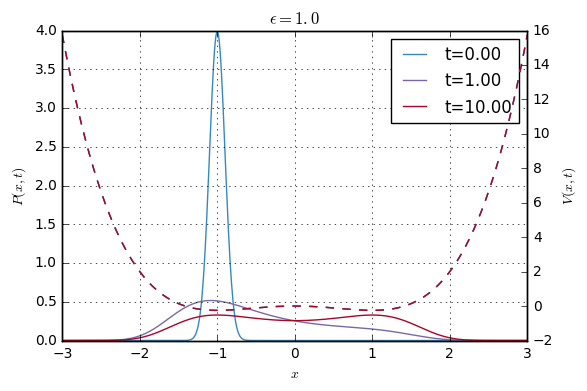

In [2]:
stochtrans1D.DoubleWell(1.0).pdfplot(0.0,1.0,10.0,potential=True,dt=0.00005,npts=600,bounds=(-3.0,3.0))

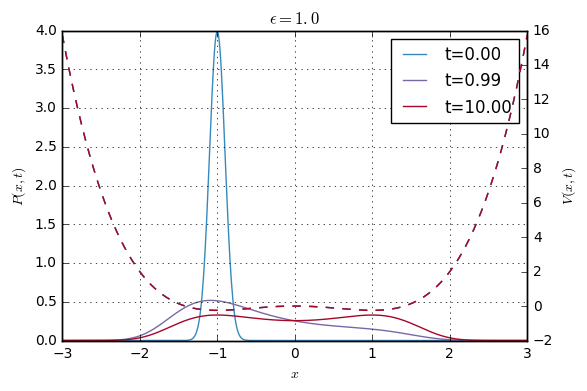

In [42]:
stochtrans1D.DoubleWell(1.0).pdfplot(0.0,1.0,10.0,potential=True,dt=0.01,npts=600,bounds=(-3.0,3.0),method='cn')

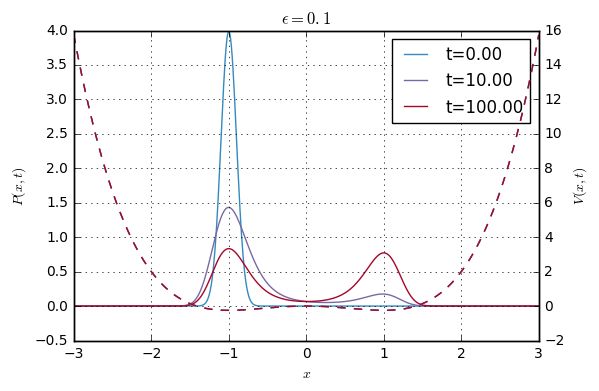

In [12]:
stochtrans1D.DoubleWell(0.1).pdfplot(0.0,10.0,100.0,potential=True,dt=0.0005,npts=600,bounds=(-3.0,3.0))

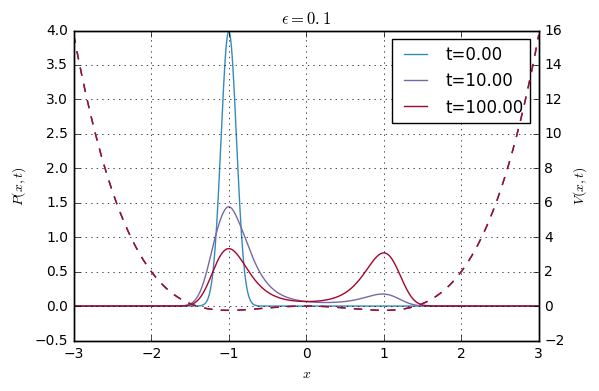

In [39]:
stochtrans1D.DoubleWell(0.1).pdfplot(0.0,10.0,100.0,potential=True,dt=0.5,npts=600,bounds=(-3.0,3.0),method='cn')

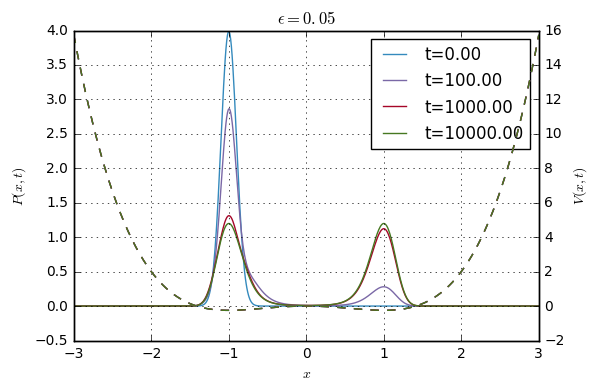

In [20]:
stochtrans1D.DoubleWell(0.05).pdfplot(0.0,100.,1000.,10000.,potential=True,dt=10.0,npts=600,bounds=(-3.0,3.0),method='cn')

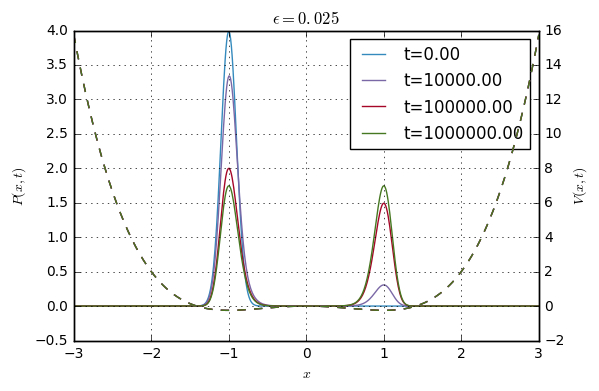

In [25]:
stochtrans1D.DoubleWell(0.025).pdfplot(0.0,10000.,100000.,1000000.,potential=True,dt=100.0,npts=600,bounds=(-3.0,3.0),method='cn')

In [36]:
np.exp(-25.)

1.3887943864964021e-11

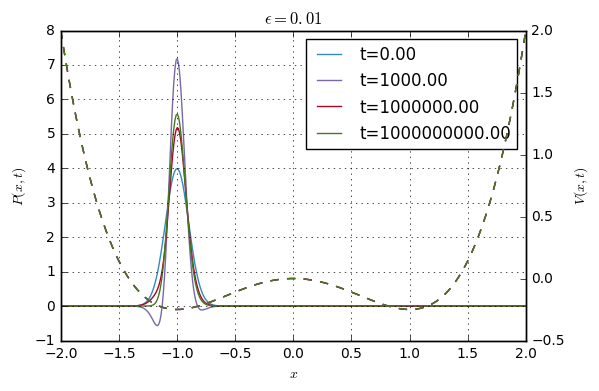

In [33]:
stochtrans1D.DoubleWell(0.01).pdfplot(0.0,1000.0,1000000.0,1000000000.0,potential=True,dt=1000.0,npts=400,bounds=(-2.0,2.0),method='cn')

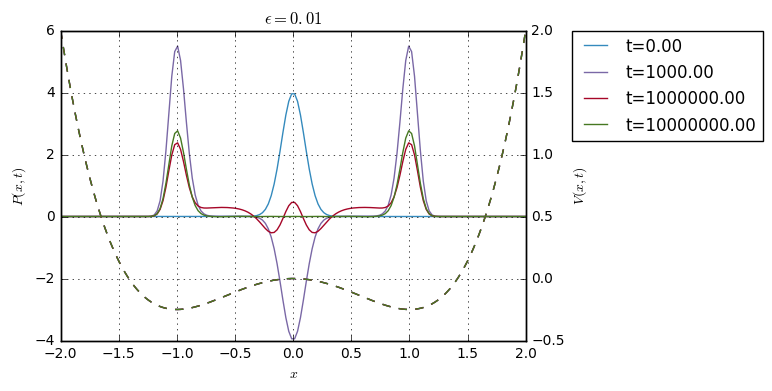

In [2]:
stochtrans1D.DoubleWell(0.01).pdfplot(0.0,1000.0,1000000.0,10000000.0,potential=True,dt=1000.0,npts=160,bounds=(-2.0,2.0),method='cn',P0center=0.0,legend_args={'bbox_to_anchor':(1.1, 1),'loc':2, 'borderaxespad':0.})

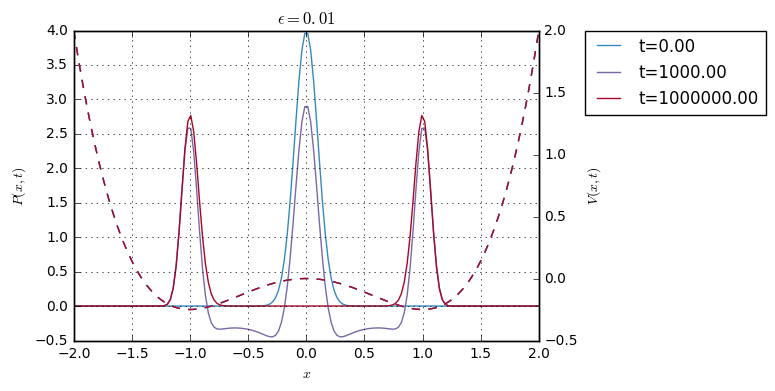

In [30]:
stochtrans1D.DoubleWell(0.01).pdfplot(0.0,1000.0,1000000.0,potential=True,dt=100.0,npts=160,bounds=(-2.0,2.0),method='cn',P0center=0.0,legend_args={'bbox_to_anchor':(1.1, 1),'loc':2, 'borderaxespad':0.})

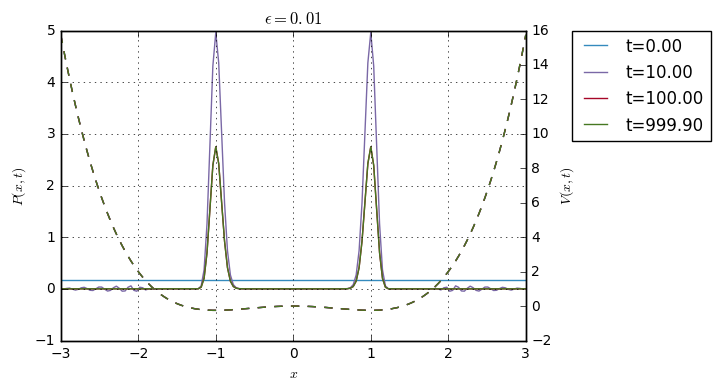

In [35]:
stochtrans1D.DoubleWell(0.01).pdfplot(0.0,10.0,100.0,1000.0,potential=True,dt=0.1,npts=160,bounds=(-3.0,3.0),method='cn',P0='uniform',legend_args={'bbox_to_anchor':(1.1, 1),'loc':2, 'borderaxespad':0.})

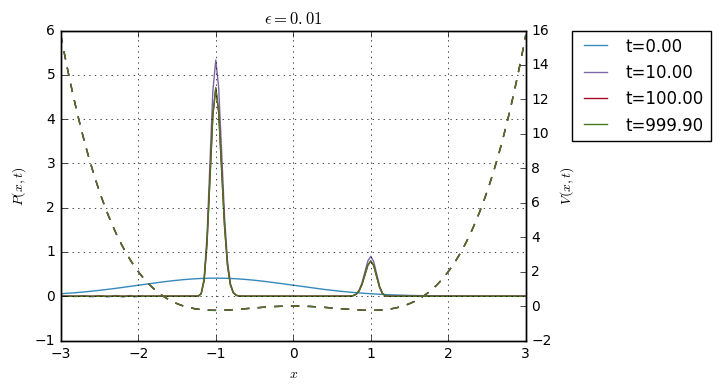

In [40]:
stochtrans1D.DoubleWell(0.01).pdfplot(0.0,10.0,100.0,1000.0,potential=True,dt=0.1,npts=160,bounds=(-3.0,3.0),method='cn',P0std=1.0,legend_args={'bbox_to_anchor':(1.1, 1),'loc':2, 'borderaxespad':0.})

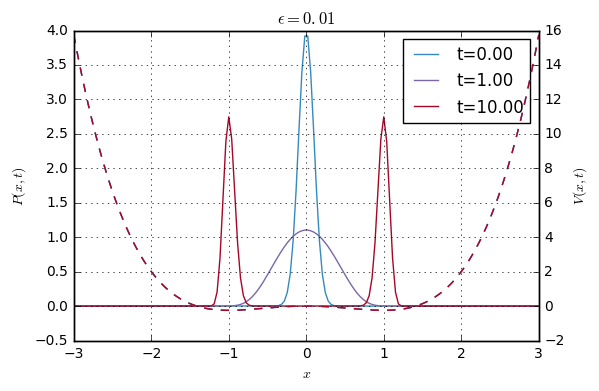

In [10]:
stochtrans1D.DoubleWell(0.01).pdfplot(0.0,1.0,10.0,potential=True,P0center=0.0,dt=0.0001,npts=160,bounds=(-3.0,3.0))

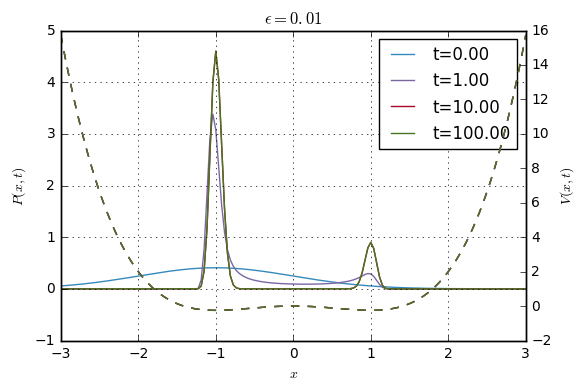

In [12]:
stochtrans1D.DoubleWell(0.01).pdfplot(0.0,1.0,10.0,100.0,potential=True,P0std=1.0,dt=0.0001,npts=160,bounds=(-3.0,3.0))

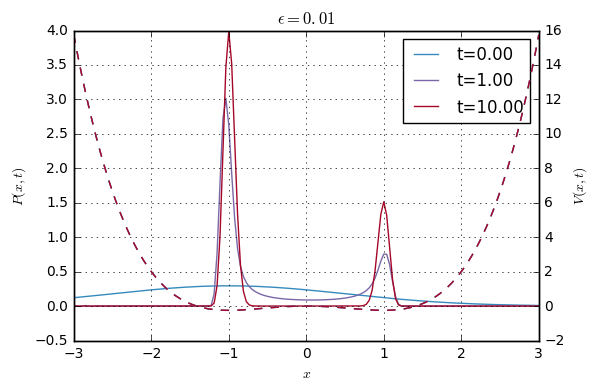

In [15]:
stochtrans1D.DoubleWell(0.01).pdfplot(0.0,1.0,10.0,potential=True,P0std=1.5,dt=0.0001,npts=160,bounds=(-3.0,3.0))

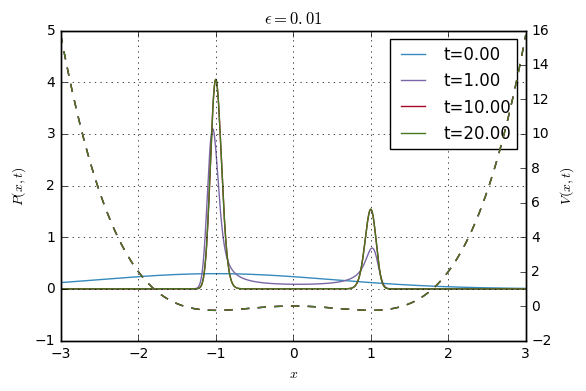

In [36]:
stochtrans1D.DoubleWell(0.01).pdfplot(0.0,1.0,10.0,20.0,potential=True,P0std=1.5,dt=0.00001,npts=1200,bounds=(-3.0,3.0))

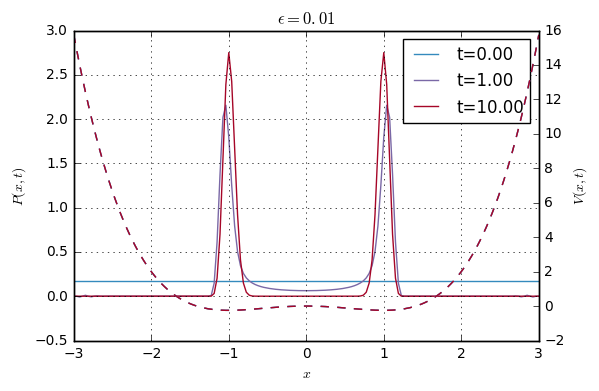

In [9]:
stochtrans1D.DoubleWell(0.01).pdfplot(0.0,1.0,10.0,potential=True,P0='uniform',dt=0.0001,npts=160,bounds=(-3.0,3.0))

*Technical Note*: For diffusion the time step should be chosen such that $\Delta t<\Delta x^2/\epsilon$. In particular lower diffusivity means we can afford a larger timestep. Here one has to bear in mind that the timestep is also constrained by the drift term: areas where the potential is steep should impose a maximum value on $\Delta t$

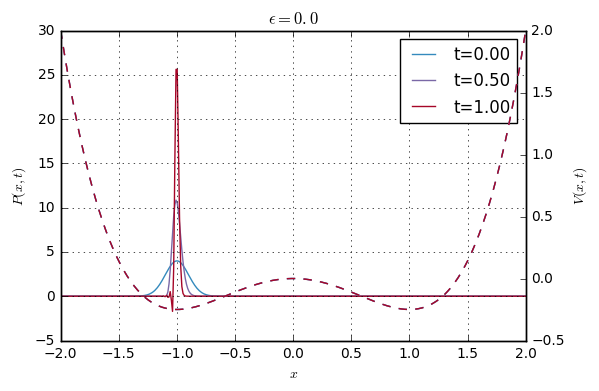

In [29]:
stochtrans1D.DoubleWell(0.).pdfplot(0.0,0.5,1.0,potential=True,dt=0.0001,npts=400,bounds=(-2.0,2.0))

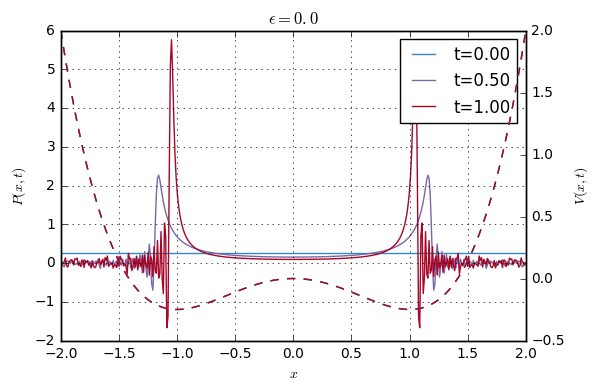

In [31]:
stochtrans1D.DoubleWell(0.).pdfplot(0.0,0.5,1.0,potential=True,dt=0.00001,npts=400,bounds=(-2.0,2.0),P0='uniform')

## First-passage time problem: reflecting BC on the left, absorbing BC at x=0

### Numerical solution of the FP equation

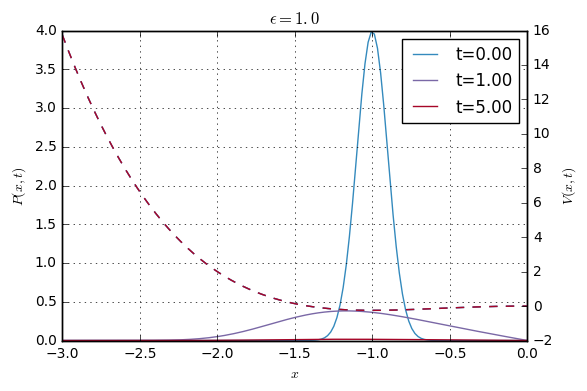

In [4]:
stochtrans1D.DoubleWell(1.0).pdfplot(0.0,1.0,5.0,potential=True,dt=0.0001,npts=150,bounds=(-3.0,0.0),bc=('reflecting','absorbing'))

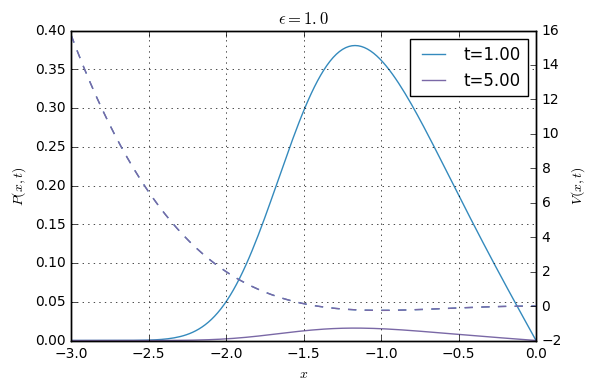

In [13]:
stochtrans1D.DoubleWell(1.0).pdfplot(1.0,5.0,t0=0.0,potential=True,dt=0.0001,npts=150,P0='dirac',bounds=(-3.0,0.0),bc=('reflecting','absorbing'))

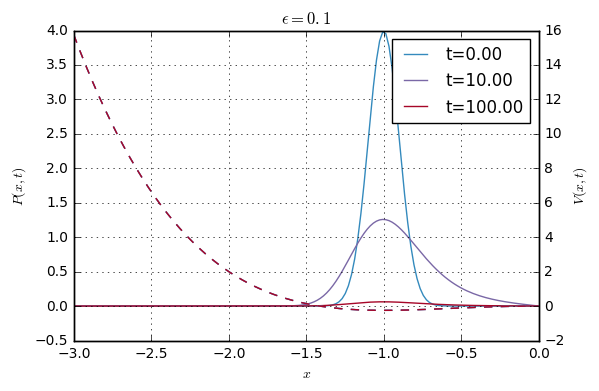

In [5]:
stochtrans1D.DoubleWell(0.1).pdfplot(0.0,10.0,100.0,potential=True,dt=0.0005,npts=150,bounds=(-3.0,0.0),bc=('reflecting','absorbing'))

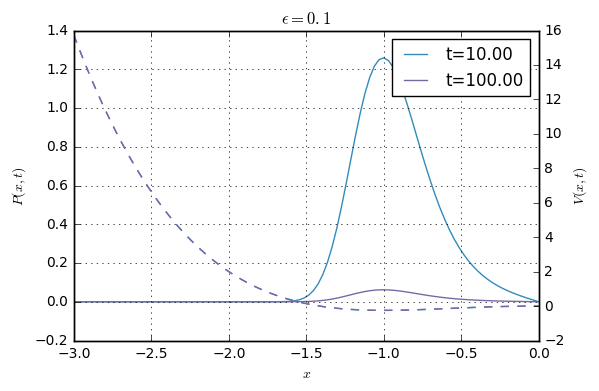

In [15]:
stochtrans1D.DoubleWell(0.1).pdfplot(10.0,100.0,t0=0.0,potential=True,dt=0.0005,npts=100,P0='dirac',bounds=(-3.0,0.0),bc=('reflecting','absorbing'))

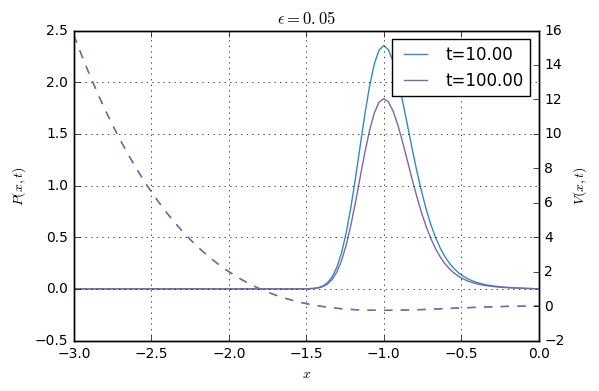

In [16]:
stochtrans1D.DoubleWell(0.05).pdfplot(10.0,100.0,t0=0.0,potential=True,dt=0.0005,npts=100,P0='dirac',bounds=(-3.0,0.0),bc=('reflecting','absorbing'))

### Numerical solution of the adjoint FP equation

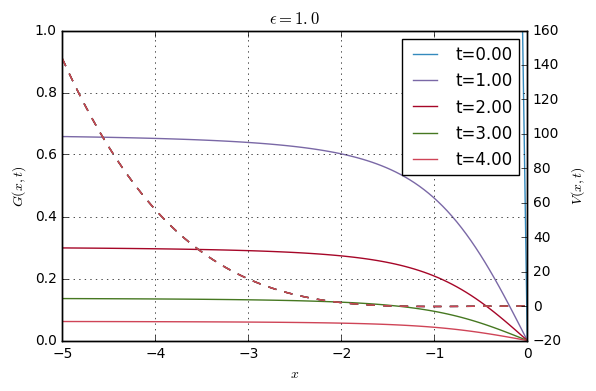

In [5]:
stochtrans1D.DoubleWell(1.0).pdfplot(*np.arange(0.0,5.0),potential=True,dt=0.0001,npts=100,bounds=(-5.0,0.0),integ=stochtrans1D.DoubleWell(1.0).fpadjintegrate,ylabel="$G(x,t)$")

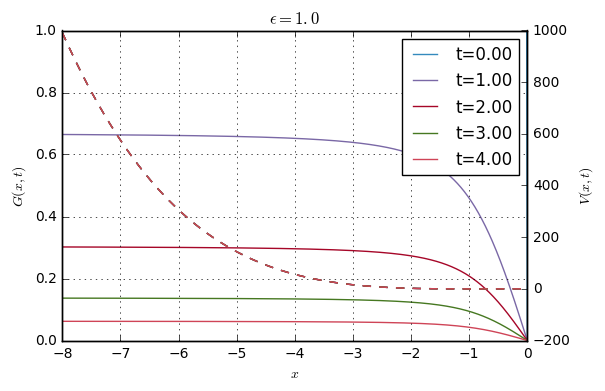

In [21]:
stochtrans1D.DoubleWell(1.0).pdfplot(*np.arange(0.0,5.0),potential=True,dt=0.00001,npts=800,bounds=(-8.0,0.0),integ=stochtrans1D.DoubleWell(1.0).fpadjintegrate,ylabel="$G(x,t)$")

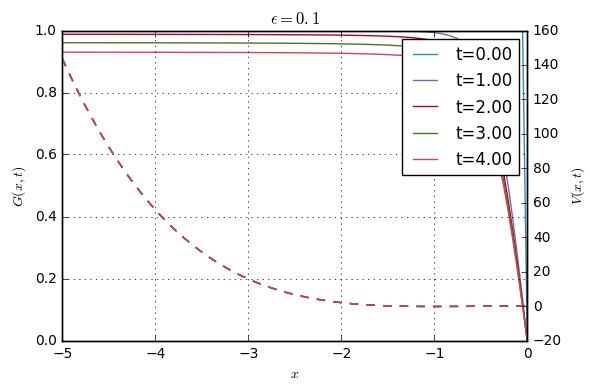

In [6]:
stochtrans1D.DoubleWell(0.1).pdfplot(*np.arange(0.0,5.0),potential=True,dt=0.00005,npts=100,bounds=(-5.0,0.0),integ=stochtrans1D.DoubleWell(0.1).fpadjintegrate,ylabel="$G(x,t)$")

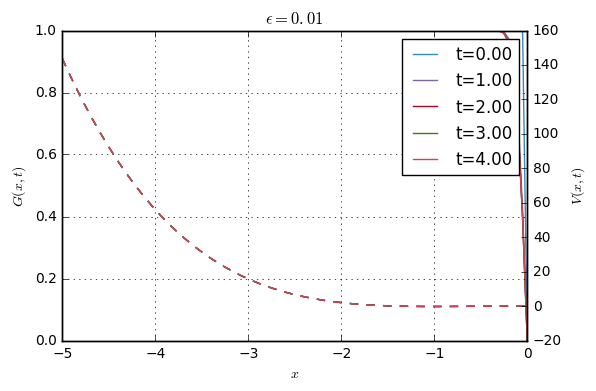

In [11]:
stochtrans1D.DoubleWell(0.01).pdfplot(*np.arange(0.0,5.0),potential=True,dt=0.00005,npts=100,bounds=(-5.0,0.0),M=0,integ=stochtrans1D.DoubleWell(0.01).fpadjintegrate,ylabel="$G(x,t)$")

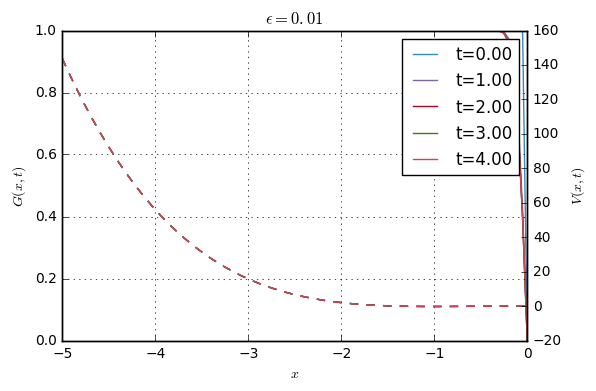

In [7]:
stochtrans1D.DoubleWell(0.01).pdfplot(*np.arange(0.0,5.0),potential=True,dt=0.0000025,npts=100,bounds=(-5.0,0.0),M=0,integ=stochtrans1D.DoubleWell(0.01).fpadjintegrate,ylabel="$G(x,t)$")

### Comparing the solutions of the FP and FP adjoint equations: $G(t)$ and $\lambda(t)$

In [9]:
import data
fpdb = data.FirstPassageFP(path="doublewell_fp.db")
fpadjdb = data.FirstPassageFP(path="doublewell_fpadj.db")

In [ ]:
opts = {1.0: {'dt':0.0001,'npts':100,'bounds':(-3.0,0.0)},
        0.1: {'dt':0.00005,'npts':100,'bounds':(-3.0,0.0)},
       0.025: {'dt':100.0,'npts':400,'bounds':(-3.0,0.0)}}

In [10]:
for M in np.arange(-1.0,1.01,0.25):
    fpadjdb[1.0,-1.0,M] = stochtrans1D.DoubleWell(1.0).firstpassagetime_cdf(-1.0,M,*np.arange(1.0,100.0),src='adjoint',dt=0.0001,npts=100,bounds=(-3.0,0.0))
    fpadjdb[0.1,-1.0,M] = stochtrans1D.DoubleWell(0.1).firstpassagetime_cdf(-1.0,M,*np.arange(1.0,100.0),src='adjoint',dt=0.00005,npts=100,bounds=(-3.0,0.0))
    fpadjdb[0.05,-1.0,M] = stochtrans1D.DoubleWell(0.05).firstpassagetime_cdf(-1.0,M,*np.arange(1.0,100.0),src='adjoint',dt=0.00005,npts=100,bounds=(-3.0,0.0))

stochtrans1D.py:434: RuntimeWarning: divide by zero encountered in log
  output = {'cdf': (time,1.0-G), 'G': (time,G), 'pdf': (time[1:-1],-edpy.CenteredFD(time).grad(G)), 'lambda': (time[1:-1],-edpy.CenteredFD(time).grad(np.log(G)))}
edpy.py:25: RuntimeWarning: invalid value encountered in subtract
  return (Y[2:]-Y[:-2])/(self.grid[2:]-self.grid[:-2])


In [17]:
for M in np.arange(-1.0,1.01,0.25):
    fpdb[1.0,-1.0,M] = stochtrans1D.DoubleWell(1.0).firstpassagetime_cdf(-1.0,M,*np.arange(1.0,100.0),dt=0.0001,npts=100,bounds=(-3.0,0.0))
    fpdb[0.1,-1.0,M] = stochtrans1D.DoubleWell(0.1).firstpassagetime_cdf(-1.0,M,*np.arange(1.0,100.0),dt=0.0005,npts=100,bounds=(-3.0,0.0))
    fpdb[0.05,-1.0,M] = stochtrans1D.DoubleWell(0.05).firstpassagetime_cdf(-1.0,M,*np.arange(1.0,100.0),dt=0.0005,npts=100,bounds=(-3.0,0.0))

stochtrans1D.py:275: RuntimeWarning: divide by zero encountered in log
  output = {'cdf': (time,1.0-G), 'G': (time,G), 'pdf': (time[1:-1],-edpy.CenteredFD(time).grad(G)), 'lambda': (time[1:-1],-edpy.CenteredFD(time).grad(np.log(G)))}
stochtrans1D.py:275: RuntimeWarning: invalid value encountered in log
  output = {'cdf': (time,1.0-G), 'G': (time,G), 'pdf': (time[1:-1],-edpy.CenteredFD(time).grad(G)), 'lambda': (time[1:-1],-edpy.CenteredFD(time).grad(np.log(G)))}
stochtrans1D.py:88: RuntimeWarning: invalid value encountered in multiply
  return -X.grad(self.F(X.grid,t)*P) + self.D0*X.laplacian(P)


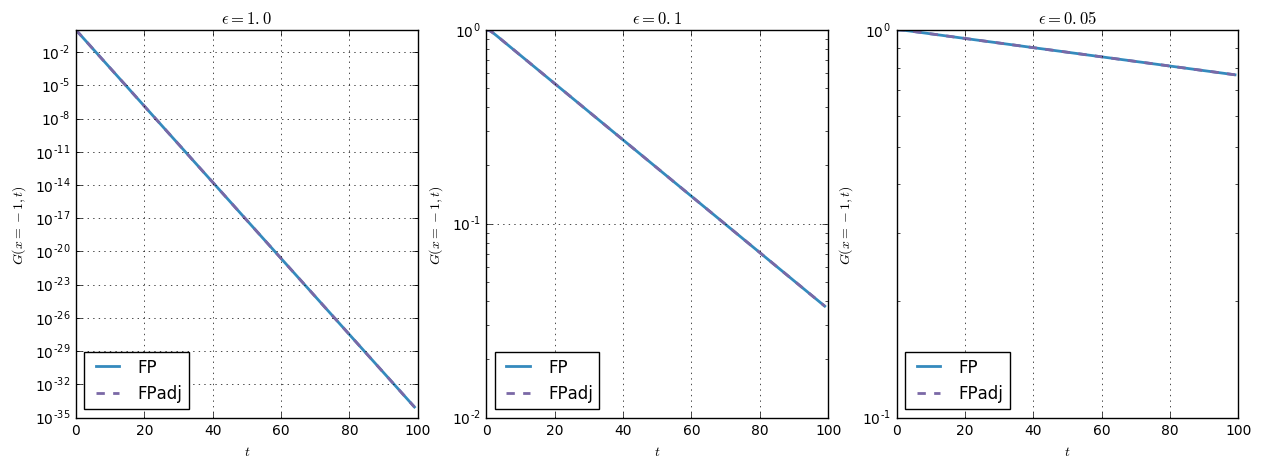

In [41]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
for ax,eps in zip(axes,(1.0,0.1,0.05)):
    ax.set_xlabel('$t$')
    ax.set_ylabel('$G(x=-1,t)$')
    ax.set_yscale('log')
    model = stochtrans1D.DoubleWell(eps)
    ax.grid()
    ax.plot(*fpdb[model.D0,-1.0,0.0],linewidth=2,label='FP')
    ax.plot(*fpadjdb[model.D0,-1.0,0.0],linewidth=2,label='FPadj',linestyle='dashed')
    ax.set_title(r'$\epsilon='+str(eps)+r'$')
    ax.legend(loc=3)
#plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
plt.show()

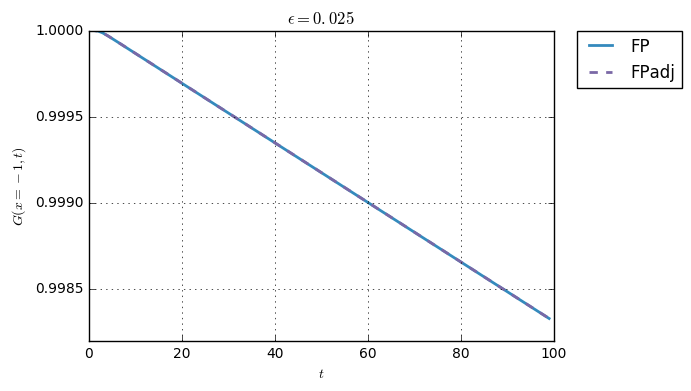

In [45]:
fig = plt.figure()
ax = plt.axes()
ax.set_xlabel('$t$')
ax.set_ylabel('$G(x=-1,t)$')
#ax.set_yscale('log')
ax.grid()
model = stochtrans1D.DoubleWell(0.025)
ax.plot(*model.firstpassagetime_cdf(-1.0,0.0,*np.arange(1.0,100.0),dt=0.0001,npts=100,bounds=(-3.0,0.0)),linewidth=2,label='FP')
ax.plot(*model.firstpassagetime_cdf(-1.0,0.0,*np.arange(1.0,100.0),src='adjoint',dt=0.00005,npts=100,bounds=(-3.0,0.0)),linewidth=2,label='FPadj',linestyle='dashed')
plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
plt.title(r'$\epsilon=0.025$')
plt.show()

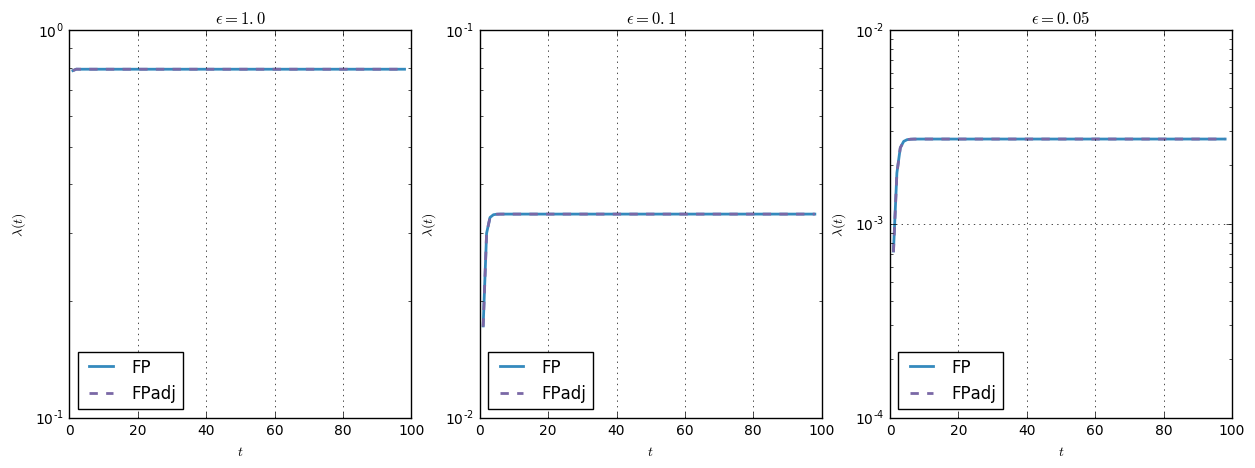

In [47]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
for ax,eps in zip(axes,(1.0,0.1,0.05)):
    ax.set_xlabel('$t$')
    ax.set_ylabel(r'$\lambda(t)$')
    ax.set_yscale('log')
    model = stochtrans1D.DoubleWell(eps)
    ax.grid()
    ax.plot(*model.firstpassagetime_cdf(-1.0,0.0,*np.arange(1.0,100.0),dt=0.0001,out='lambda',npts=100,bounds=(-3.0,0.0)),linewidth=2,label='FP')
    ax.plot(*model.firstpassagetime_cdf(-1.0,0.0,*np.arange(1.0,100.0),dt=0.00005,out='lambda',npts=100,bounds=(-3.0,0.0),src='adjoint'),linewidth=2,label='FPadj',linestyle='dashed')
    ax.set_title(r'$\epsilon='+str(eps)+r'$')
    ax.legend(loc=3)
plt.show()

# Synthesis: First-passage time; MC and FP approaches

# Mean first-passage time: comparing to the exact formula

In [30]:
stochtrans1D.DoubleWell(0.1).firstpassagetime_avg(-1.0,0.0,src='theory')

(array([ 0.]), array([ 30.81527431]))

In [2]:
stochtrans1D.DoubleWell(0.1).firstpassagetime_avg(-1.0,0.0,src='adjoint',dt=0.00005,npts=100,bounds=(-5.0,0.0))

(array([ 0.]), array([ 30.03084832]))

In [11]:
np.arange(-1.0,1.01,0.25)

array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ])

In [3]:
stochtrans1D.DoubleWell(0.1).firstpassagetime_avg(-1.0,-0.9,src='adjoint',dt=0.00005,npts=100,bounds=(-5.0,0.0))

(array([-0.9]), array([ 5.55555557]))

In [26]:
np.exp(-0.25)

0.77880078307140488

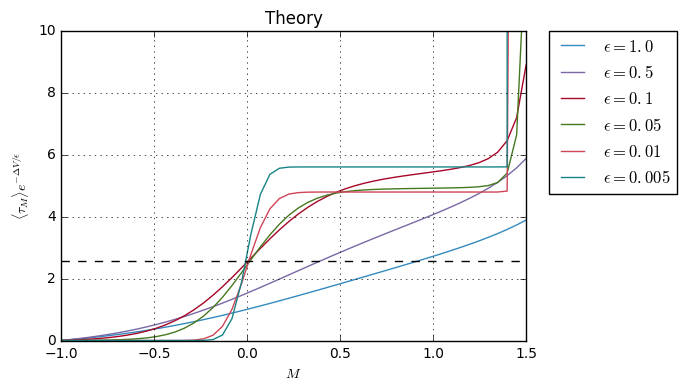

In [11]:
fig = plt.figure()
ax = plt.axes()
ax.set_xlabel(r'$M$')
ax.set_ylabel(r'$\langle\tau_M\rangle e^{-\Delta V/\epsilon}$')
ax.set_ylim((0,10))
ax.grid()
for eps in (1.0,0.5,0.1,0.05,0.01,0.005):
    t,tau = stochtrans1D.DoubleWell(eps).firstpassagetime_avg(-1.0,*np.linspace(-1.0,1.5),src='theory')
    ax.plot(t,tau*np.exp(-1./(4.*eps)),label=r'$\epsilon='+str(eps)+r'$')
ax.axhline(y=2*np.pi/np.sqrt(6),color='black',linestyle='dashed') # the curves with epsilon small enough should all intersect this line at M=0
plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
plt.title('Theory')
plt.show()

stochtrans1D.py:92: RuntimeWarning: overflow encountered in multiply
  return self.F(X.grid,t)[1:-1]*X.grad(G)+self.D0*X.laplacian(G)
stochtrans1D.py:92: RuntimeWarning: invalid value encountered in add
  return self.F(X.grid,t)[1:-1]*X.grad(G)+self.D0*X.laplacian(G)
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


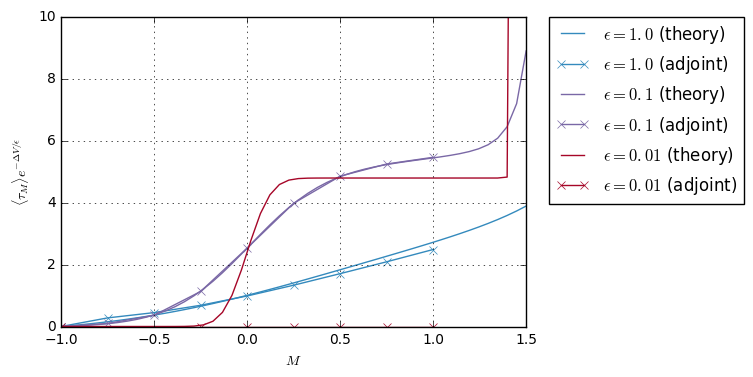

In [3]:
fig = plt.figure()
ax = plt.axes()
ax.set_xlabel(r'$M$')
ax.set_ylabel(r'$\langle\tau_M\rangle e^{-\Delta V/\epsilon}$')
ax.set_ylim((0,10))
ax.grid()
for eps in (1.0,0.1,0.01):
    t,tau = stochtrans1D.DoubleWell(eps).firstpassagetime_avg(-1.0,*np.linspace(-1.0,1.5),src='theory')
    line, = ax.plot(t,tau*np.exp(-1./(4.*eps)),label=r'$\epsilon='+str(eps)+r'$ (theory)')
    t,tau = stochtrans1D.DoubleWell(eps).firstpassagetime_avg(-1.0,*np.arange(-1.0,1.01,0.25),src='adjoint',dt=0.00005,npts=100,bounds=(-5.0,0.0))
    ax.plot(t,tau*np.exp(-1./(4.*eps)),label=r'$\epsilon='+str(eps)+r'$ (adjoint)',marker='x',color=line.get_color())
plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
plt.show()

stochtrans1D.py:356: RuntimeWarning: invalid value encountered in log
  output = {'cdf': (time,1.0-G), 'G': (time,G), 'pdf': (time[1:-1],-edpy.CenteredFD(time).grad(G)), 'lambda': (time[1:-1],-edpy.CenteredFD(time).grad(np.log(G)))}
stochtrans1D.py:386: RuntimeWarning: invalid value encountered in log
  logG = interp1d(t,np.log(G),fill_value="extrapolate")


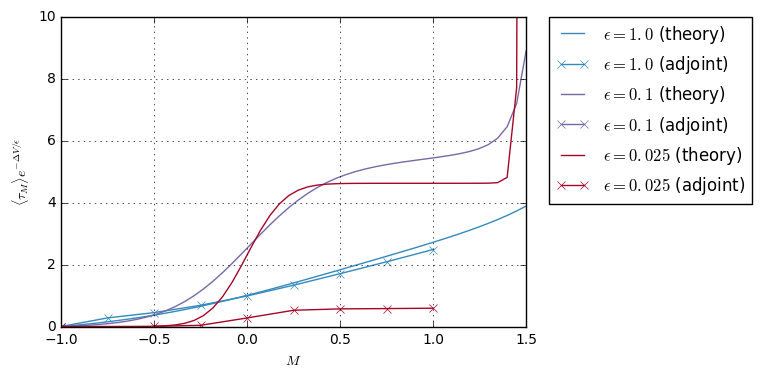

In [44]:
fig = plt.figure()
ax = plt.axes()
ax.set_xlabel(r'$M$')
ax.set_ylabel(r'$\langle\tau_M\rangle e^{-\Delta V/\epsilon}$')
ax.set_ylim((0,10))
ax.grid()
opts = {1.0: {'dt':0.01,'npts':100,'bounds':(-3.0,0.0),'method':'cn'},
        0.1: {'dt':0.5,'npts':100,'bounds':(-3.0,0.0),'method':'cn'},
       0.025: {'dt':100.0,'npts':400,'bounds':(-3.0,0.0),'method':'cn'}}
for eps in (1.0,0.1,0.025):
    t,tau = stochtrans1D.DoubleWell(eps).firstpassagetime_avg(-1.0,*np.linspace(-1.0,1.5),src='theory')
    line, = ax.plot(t,tau*np.exp(-1./(4.*eps)),label=r'$\epsilon='+str(eps)+r'$ (theory)')
    t,tau = stochtrans1D.DoubleWell(eps).firstpassagetime_avg(-1.0,*np.arange(-1.0,1.01,0.25),src='adjoint',**opts.get(eps))
    ax.plot(t,tau*np.exp(-1./(4.*eps)),label=r'$\epsilon='+str(eps)+r'$ (adjoint)',marker='x',color=line.get_color())
plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
plt.show()

In [35]:
import data
db = data.FirstPassageData(stochtrans1D.DoubleWell,path="~/data/stochtrans/doublewell.db")

In [11]:
for A in np.arange(-1.0,1.01,0.25):
    db[0.025,0.0,-1.0,0.01,A,100000]

In [42]:
for eps in (1.0,0.1,0.05):
    for A in np.arange(-1.0,1.01,0.25):
        db[eps,0.0,-1.0,0.01,A,10000]

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in divide


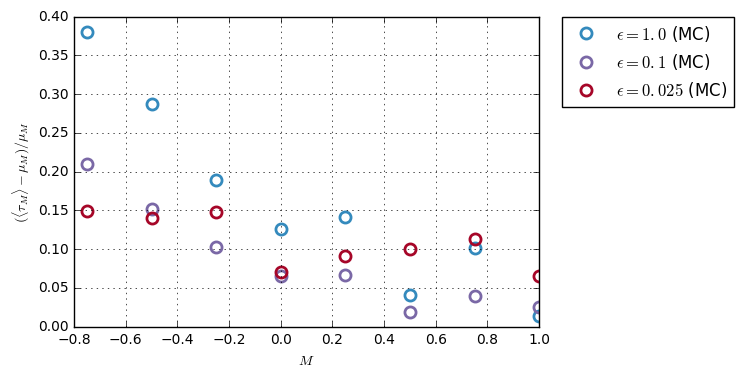

In [26]:
fig = plt.figure()
ax = plt.axes()
ax.set_xlabel(r'$M$')
ax.set_ylabel(r'$(\langle\tau_M\rangle-\mu_M)/\mu_M$')
#ax.set_ylim((0,10))
ax.grid()
opts = {1.0: {'dt':0.01,'npts':100,'bounds':(-3.0,0.0),'method':'cn'},
        0.1: {'dt':0.5,'npts':100,'bounds':(-3.0,0.0),'method':'cn'},
       0.025: {'dt':100.0,'npts':400,'bounds':(-3.0,0.0),'method':'cn'}}
for eps in (1.0,0.1,0.025):
    #M,tau = stochtrans1D.DoubleWell(eps).firstpassagetime_avg(-1.0,*np.arange(-1.0,1.01,0.25),src='adjoint',**opts.get(eps))
    #ax.plot(M,tau*scale_fact,label=r'$\epsilon='+str(eps)+r'$ (adjoint)',marker='x',color=line.get_color())
    M,tau=zip(*[(A,np.mean(db.getsamples(eps,A,t0=0.0,x0=-1.0,dt=0.01,n=1000))) for A in np.arange(-1.0,1.01,0.25)])
    M,tau_th = stochtrans1D.DoubleWell(eps).firstpassagetime_avg(-1.0,*M,src='theory')
    ax.plot(np.array(M),np.abs(np.array(tau)-np.array(tau_th))/np.array(tau_th),label=r'$\epsilon='+str(eps)+r'$ (MC)',marker='o',linestyle='None',fillstyle='none',markeredgewidth=2,markersize=8)
#ax.axhline(y=2*np.pi/np.sqrt(6),color='black',linestyle='dashed') # the curves with epsilon small enough should all intersect this line at M=0
plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.,numpoints=1)
plt.show()

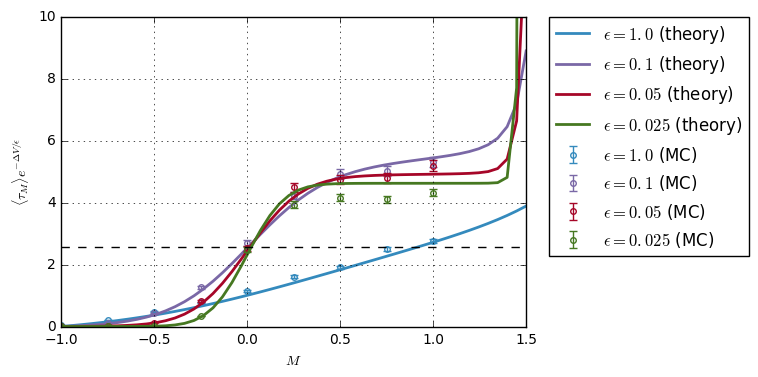

In [44]:
fig = plt.figure()
ax = plt.axes()
ax.set_xlabel(r'$M$')
ax.set_ylabel(r'$\langle\tau_M\rangle e^{-\Delta V/\epsilon}$')
ax.set_ylim((0,10))
ax.grid()
opts = {1.0: {'dt':0.01,'npts':100,'bounds':(-3.0,0.0),'method':'cn'},
        0.1: {'dt':0.5,'npts':100,'bounds':(-3.0,0.0),'method':'cn'},
       0.025: {'dt':100.0,'npts':400,'bounds':(-3.0,0.0),'method':'cn'}}
for eps in (1.0,0.1,0.05,0.025):
    scale_fact = np.exp(-1./(4.*eps))
    M,tau = stochtrans1D.DoubleWell(eps).firstpassagetime_avg(-1.0,*np.linspace(-1.0,1.5),src='theory')
    line, = ax.plot(M,tau*scale_fact,linewidth=2,label=r'$\epsilon='+str(eps)+r'$ (theory)')
    #M,tau = stochtrans1D.DoubleWell(eps).firstpassagetime_avg(-1.0,*np.arange(-1.0,1.01,0.25),src='adjoint',**opts.get(eps))
    #ax.plot(M,tau*scale_fact,label=r'$\epsilon='+str(eps)+r'$ (adjoint)',marker='x',color=line.get_color())
    M,tau=zip(*[(A,np.mean(db.getsamples(eps,A,t0=0.0,x0=-1.0,dt=0.01,n=1000))) for A in np.arange(-1.0,1.01,0.25)])
    err = np.array([np.std(db.getsamples(eps,A,t0=0.0,x0=-1.0,dt=0.01,n=1000))/np.sqrt(len(db.getsamples(eps,A,t0=0.0,x0=-1.0,dt=0.01,n=1000))) for A in M])
    ax.errorbar(np.array(M),np.array(tau)*scale_fact,err*scale_fact,label=r'$\epsilon='+str(eps)+r'$ (MC)',marker='o',linestyle='None',fillstyle='none',color=line.get_color(),markeredgewidth=1,markersize=4)
ax.axhline(y=2*np.pi/np.sqrt(6),color='black',linestyle='dashed') # the curves with epsilon small enough should all intersect this line at M=0
plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.,numpoints=1)
plt.show()

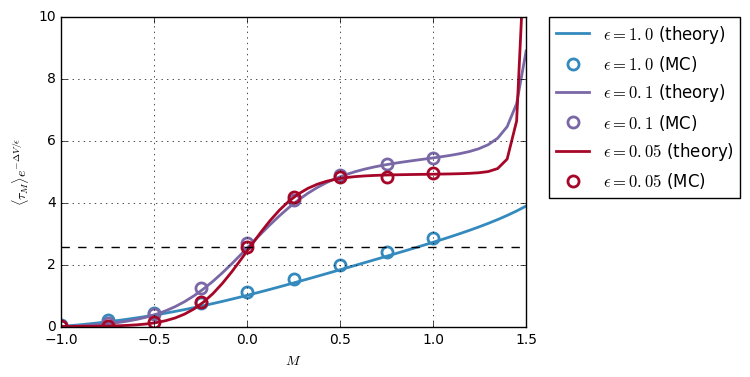

In [43]:
fig = plt.figure()
ax = plt.axes()
ax.set_xlabel(r'$M$')
ax.set_ylabel(r'$\langle\tau_M\rangle e^{-\Delta V/\epsilon}$')
ax.set_ylim((0,10))
ax.grid()
opts = {1.0: {'dt':0.01,'npts':100,'bounds':(-3.0,0.0),'method':'cn'},
        0.1: {'dt':0.5,'npts':100,'bounds':(-3.0,0.0),'method':'cn'},
       0.025: {'dt':100.0,'npts':400,'bounds':(-3.0,0.0),'method':'cn'}}
for eps in (1.0,0.1,0.05):
    M,tau = stochtrans1D.DoubleWell(eps).firstpassagetime_avg(-1.0,*np.linspace(-1.0,1.5),src='theory')
    line, = ax.plot(M,tau*np.exp(-1./(4.*eps)),linewidth=2,label=r'$\epsilon='+str(eps)+r'$ (theory)')
    #M,tau = stochtrans1D.DoubleWell(eps).firstpassagetime_avg(-1.0,*np.arange(-1.0,1.01,0.25),src='adjoint',**opts.get(eps))
    #ax.plot(M,tau*np.exp(-1./(4.*eps)),label=r'$\epsilon='+str(eps)+r'$ (adjoint)',marker='x',color=line.get_color())
    M,tau=zip(*[(A,np.mean(db.getsamples(eps,A,t0=0.0,x0=-1.0,dt=0.01))) for A in np.arange(-1.0,1.01,0.25)])    
    ax.plot(np.array(M),np.array(tau)*np.exp(-1./(4.*eps)),label=r'$\epsilon='+str(eps)+r'$ (MC)',marker='o',linestyle='None',fillstyle='none',color=line.get_color(),markeredgewidth=2,markersize=8)
ax.axhline(y=2*np.pi/np.sqrt(6),color='black',linestyle='dashed') # the curves with epsilon small enough should all intersect this line at M=0
plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.,numpoints=1)
plt.show()

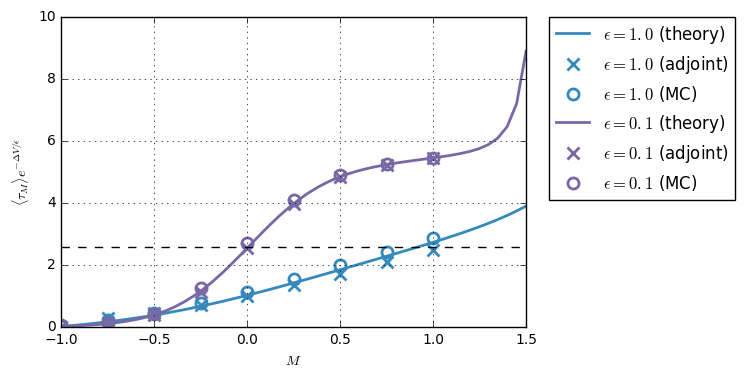

In [25]:
fig = plt.figure()
ax = plt.axes()
ax.set_xlabel(r'$M$')
ax.set_ylabel(r'$\langle\tau_M\rangle e^{-\Delta V/\epsilon}$')
ax.set_ylim((0,10))
ax.grid()
#opts = {1.0: {'dt':0.01,'npts':100,'bounds':(-3.0,0.0),'method':'cn'},
#        0.1: {'dt':0.5,'npts':100,'bounds':(-3.0,0.0),'method':'cn'},
#       0.025: {'dt':100.0,'npts':400,'bounds':(-3.0,0.0),'method':'cn'}}
opts = {1.0: {'dt':0.0001,'npts':100,'bounds':(-3.0,0.0)},
        0.1: {'dt':0.00005,'npts':100,'bounds':(-3.0,0.0)},
       0.025: {'dt':100.0,'npts':400,'bounds':(-3.0,0.0)}}
for eps in (1.0,0.1):
    M,tau = stochtrans1D.DoubleWell(eps).firstpassagetime_avg(-1.0,*np.linspace(-1.0,1.5),src='theory')
    line, = ax.plot(M,tau*np.exp(-1./(4.*eps)),linewidth=2,label=r'$\epsilon='+str(eps)+r'$ (theory)')
    M,tau = stochtrans1D.DoubleWell(eps).firstpassagetime_avg(-1.0,*np.arange(-1.0,1.01,0.25),src='adjoint',**opts.get(eps))
    ax.plot(M,tau*np.exp(-1./(4.*eps)),label=r'$\epsilon='+str(eps)+r'$ (adjoint)',marker='x',linestyle='None',color=line.get_color(),markeredgewidth=2,markersize=8)
    M,tau=zip(*[(A,np.mean(db.getsamples(eps,A,t0=0.0,x0=-1.0,dt=0.01))) for A in np.arange(-1.0,1.01,0.25)])    
    ax.plot(np.array(M),np.array(tau)*np.exp(-1./(4.*eps)),label=r'$\epsilon='+str(eps)+r'$ (MC)',marker='o',linestyle='None',fillstyle='none',color=line.get_color(),markeredgewidth=2,markersize=8)
ax.axhline(y=2*np.pi/np.sqrt(6),color='black',linestyle='dashed') # the curves with epsilon small enough should all intersect this line at M=0
plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.,numpoints=1)
plt.show()

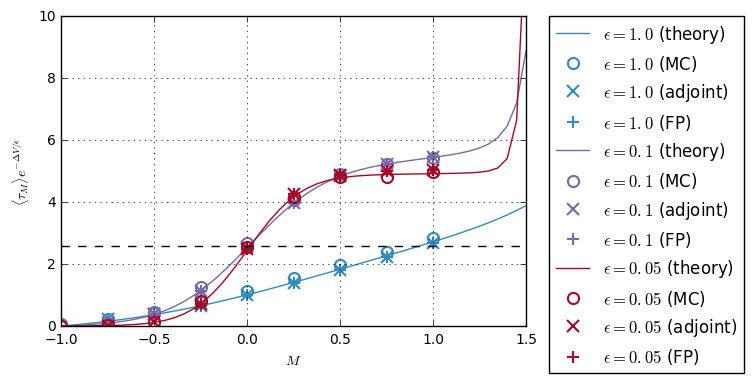

In [38]:
fig = plt.figure()
ax = plt.axes()
ax.set_xlabel(r'$M$')
ax.set_ylabel(r'$\langle\tau_M\rangle e^{-\Delta V/\epsilon}$')
ax.set_ylim((0,10))
ax.grid()
for eps in (1.0,0.1,0.05):
    M,tau = stochtrans1D.DoubleWell(eps).firstpassagetime_avg(-1.0,*np.linspace(-1.0,1.5),src='theory')
    line, = ax.plot(M,tau*np.exp(-1./(4.*eps)),linewidth=1,label=r'$\epsilon='+str(eps)+r'$ (theory)')    
    M,tau=zip(*[(A,np.mean(db.getsamples(eps,A,t0=0.0,x0=-1.0,dt=0.01))) for A in np.arange(-1.0,1.01,0.25)])    
    ax.plot(np.array(M),np.array(tau)*np.exp(-1./(4.*eps)),label=r'$\epsilon='+str(eps)+r'$ (MC)',marker='o',linestyle='None',fillstyle='none',color=line.get_color(),markeredgewidth=1.5,markersize=8)
    tau = np.array([fpadjdb.get_avg(eps,A,-1.0) for A in M])
    ax.plot(np.array(M),tau*np.exp(-1./(4.*eps)),label=r'$\epsilon='+str(eps)+r'$ (adjoint)',marker='x',linestyle='None',color=line.get_color(),markeredgewidth=1.5,markersize=8)
    tau = np.array([fpdb.get_avg(eps,A,-1.0) for A in M])
    ax.plot(np.array(M),tau*np.exp(-1./(4.*eps)),label=r'$\epsilon='+str(eps)+r'$ (FP)',marker='+',linestyle='None',color=line.get_color(),markeredgewidth=1.5,markersize=8)
ax.axhline(y=2*np.pi/np.sqrt(6),color='black',linestyle='dashed') # the curves with epsilon small enough should all intersect this line at M=0
plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.,numpoints=1)
plt.show()

## The full distribution of the first-passage time

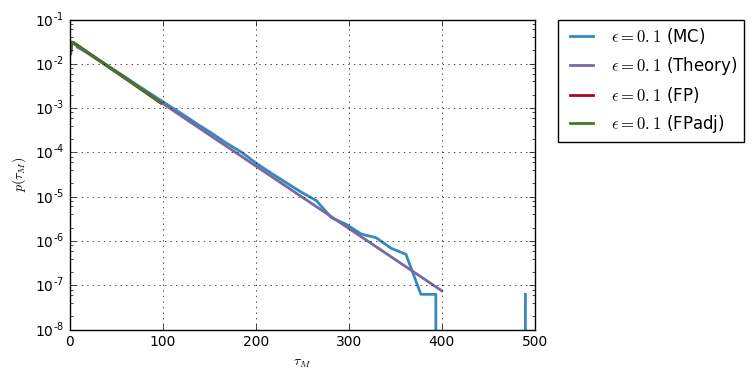

In [49]:
model = stochtrans1D.DoubleWell(0.1)
stochtrans1D.StochModel.escapetime_pdfplot(
    stochtrans1D.StochModel.escapetime_pdf(db[0.1,0.0,-1.0,0.01,0.0]),
    model.firstpassagetime_cdf(-1.0,0.0,*np.linspace(0.,400.0),src='theory',out='pdf'),
    model.firstpassagetime_cdf(-1.0,0.0,*np.arange(1.0,100.0),dt=0.0001,out='pdf',npts=100,bounds=(-3.0,0.0)),
    model.firstpassagetime_cdf(-1.0,0.0,*np.arange(1.0,100.0),dt=0.00005,out='pdf',npts=100,bounds=(-3.0,0.0),src='adjoint'),
    labels=[r'$\epsilon=0.1$ (MC)',r'$\epsilon=0.1$ (Theory)',r'$\epsilon=0.1$ (FP)',r'$\epsilon=0.1$ (FPadj)'],yscale='log')

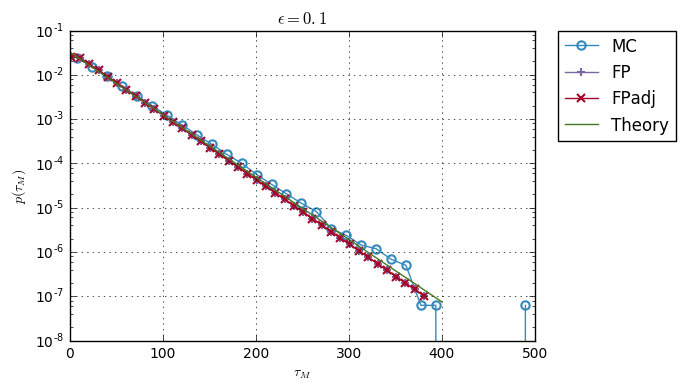

In [59]:
model = stochtrans1D.DoubleWell(0.1)
fig = plt.figure()
ax = plt.axes()
ax.grid()
ax.set_xlabel(r'$\tau_M$')
ax.set_ylabel(r'$p(\tau_M)$')
ax.set_yscale('log')
ax.plot(*model.escapetime_pdf(db[model.D0,0.0,-1.0,0.01,0.0]),label='MC',marker='o',fillstyle='none',markeredgewidth=1.5)
ax.plot(*model.firstpassagetime_cdf(-1.0,0.0,*np.arange(1.0,400.0,10.0),dt=0.0001,out='pdf',npts=100,bounds=(-3.0,0.0)),label='FP',marker='+',markeredgewidth=1.5)
ax.plot(*model.firstpassagetime_cdf(-1.0,0.0,*np.arange(1.0,400.0,10.0),dt=0.00005,out='pdf',npts=100,bounds=(-3.0,0.0),src='adjoint'),label='FPadj',marker='x',markeredgewidth=1.5)
ax.plot(*model.firstpassagetime_cdf(-1.0,0.0,*np.linspace(0.,400.0),src='theory',out='pdf'),label='Theory')
plt.title(r'$\epsilon='+str(model.D0)+r'$')
plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.,numpoints=1)
plt.show()

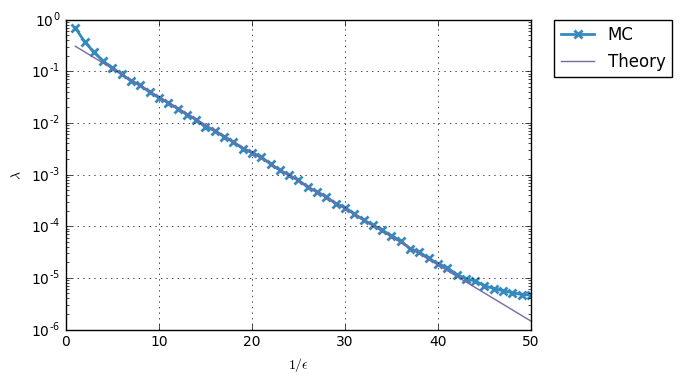

In [50]:
ax = plt.axes()
ax.set_yscale('log')
ax.set_xlabel(r'$1/\epsilon$')
ax.set_ylabel(r'$\lambda$')
ax.grid()
line, = ax.plot(*zip(*[(1./eps,1./np.mean(db[eps,0.0,-1.0,0.01,0.0])) for eps in sorted(db.show_eps())]),lw=2,marker='x',mew=2,label='MC')
line, = ax.plot(*zip(*[(1./eps,np.exp(-0.25/eps)*np.sqrt(6)/(2*np.pi)) for eps in sorted(db.show_eps())]),label='Theory')
legend = plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.,numpoints=1)

# Instantons

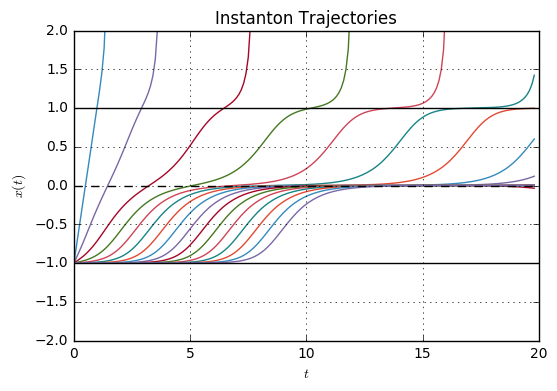

In [12]:
times = np.arange(0.0,20.0,0.1)
def myfun(times,p0):
    x = stochtrans1D.DoubleWell(0.1).instanton(-1.0,p0,*times)[:,0]
    filt = (x>100.0).nonzero()[0]
    if len(filt) >0:
        maxind = filt[0]
    else:
        maxind = -1
    return times[:maxind], x[:maxind]
stochtrans1D.DoubleWell(0.1).trajectoryplot(*[myfun(times,p0) for p0 in 10**np.arange(0.0,-8.0,-0.5)],title='Instanton Trajectories',ylim=(-2,2))